# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [23]:
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar100.load_data()

In [19]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [24]:
print(x_img_train.shape)
print(y_label_train.shape)
print(x_img_test.shape)
print(y_label_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [15]:
#針對物件圖像數據集的類別編列成字典
label_dict={0:"000",1:"001",2:"002",3:"003",4:"004",5:"005",6:"006",7:"007",8:"008",9:"009",
           10:"010",11:"011",12:"012",13:"013",14:"014",15:"015",16:"016",17:"017",18:"018",19:"019",
           20:"020",21:"021",22:"022",23:"023",24:"024",25:"025",26:"026",27:"027",28:"028",29:"029",
           30:"030",31:"031",32:"032",33:"033",34:"034",35:"035",36:"036",37:"037",38:"038",39:"039",
           40:"040",41:"041",42:"042",43:"043",44:"044",45:"045",46:"046",47:"047",48:"048",49:"049",
           50:"050",51:"051",52:"052",53:"053",54:"054",55:"055",56:"056",57:"057",58:"058",59:"059",
           60:"060",61:"061",62:"062",63:"063",64:"064",65:"065",66:"066",67:"067",68:"068",69:"069",
           70:"070",71:"071",72:"072",73:"073",74:"074",75:"075",76:"076",77:"077",78:"078",79:"079",
           80:"080",81:"081",82:"082",83:"083",84:"084",85:"085",86:"086",87:"087",88:"088",89:"089",
           90:"090",91:"091",92:"092",93:"093",94:"094",95:"095",96:"096",97:"097",98:"098",99:"099",
         }

In [36]:
#導入影像列印模組
import matplotlib.pyplot as plt

##宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(32,32)
    if num>200: num=200 
    for i in range(0, num):
        ax=plt.subplot(20,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i) # +','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

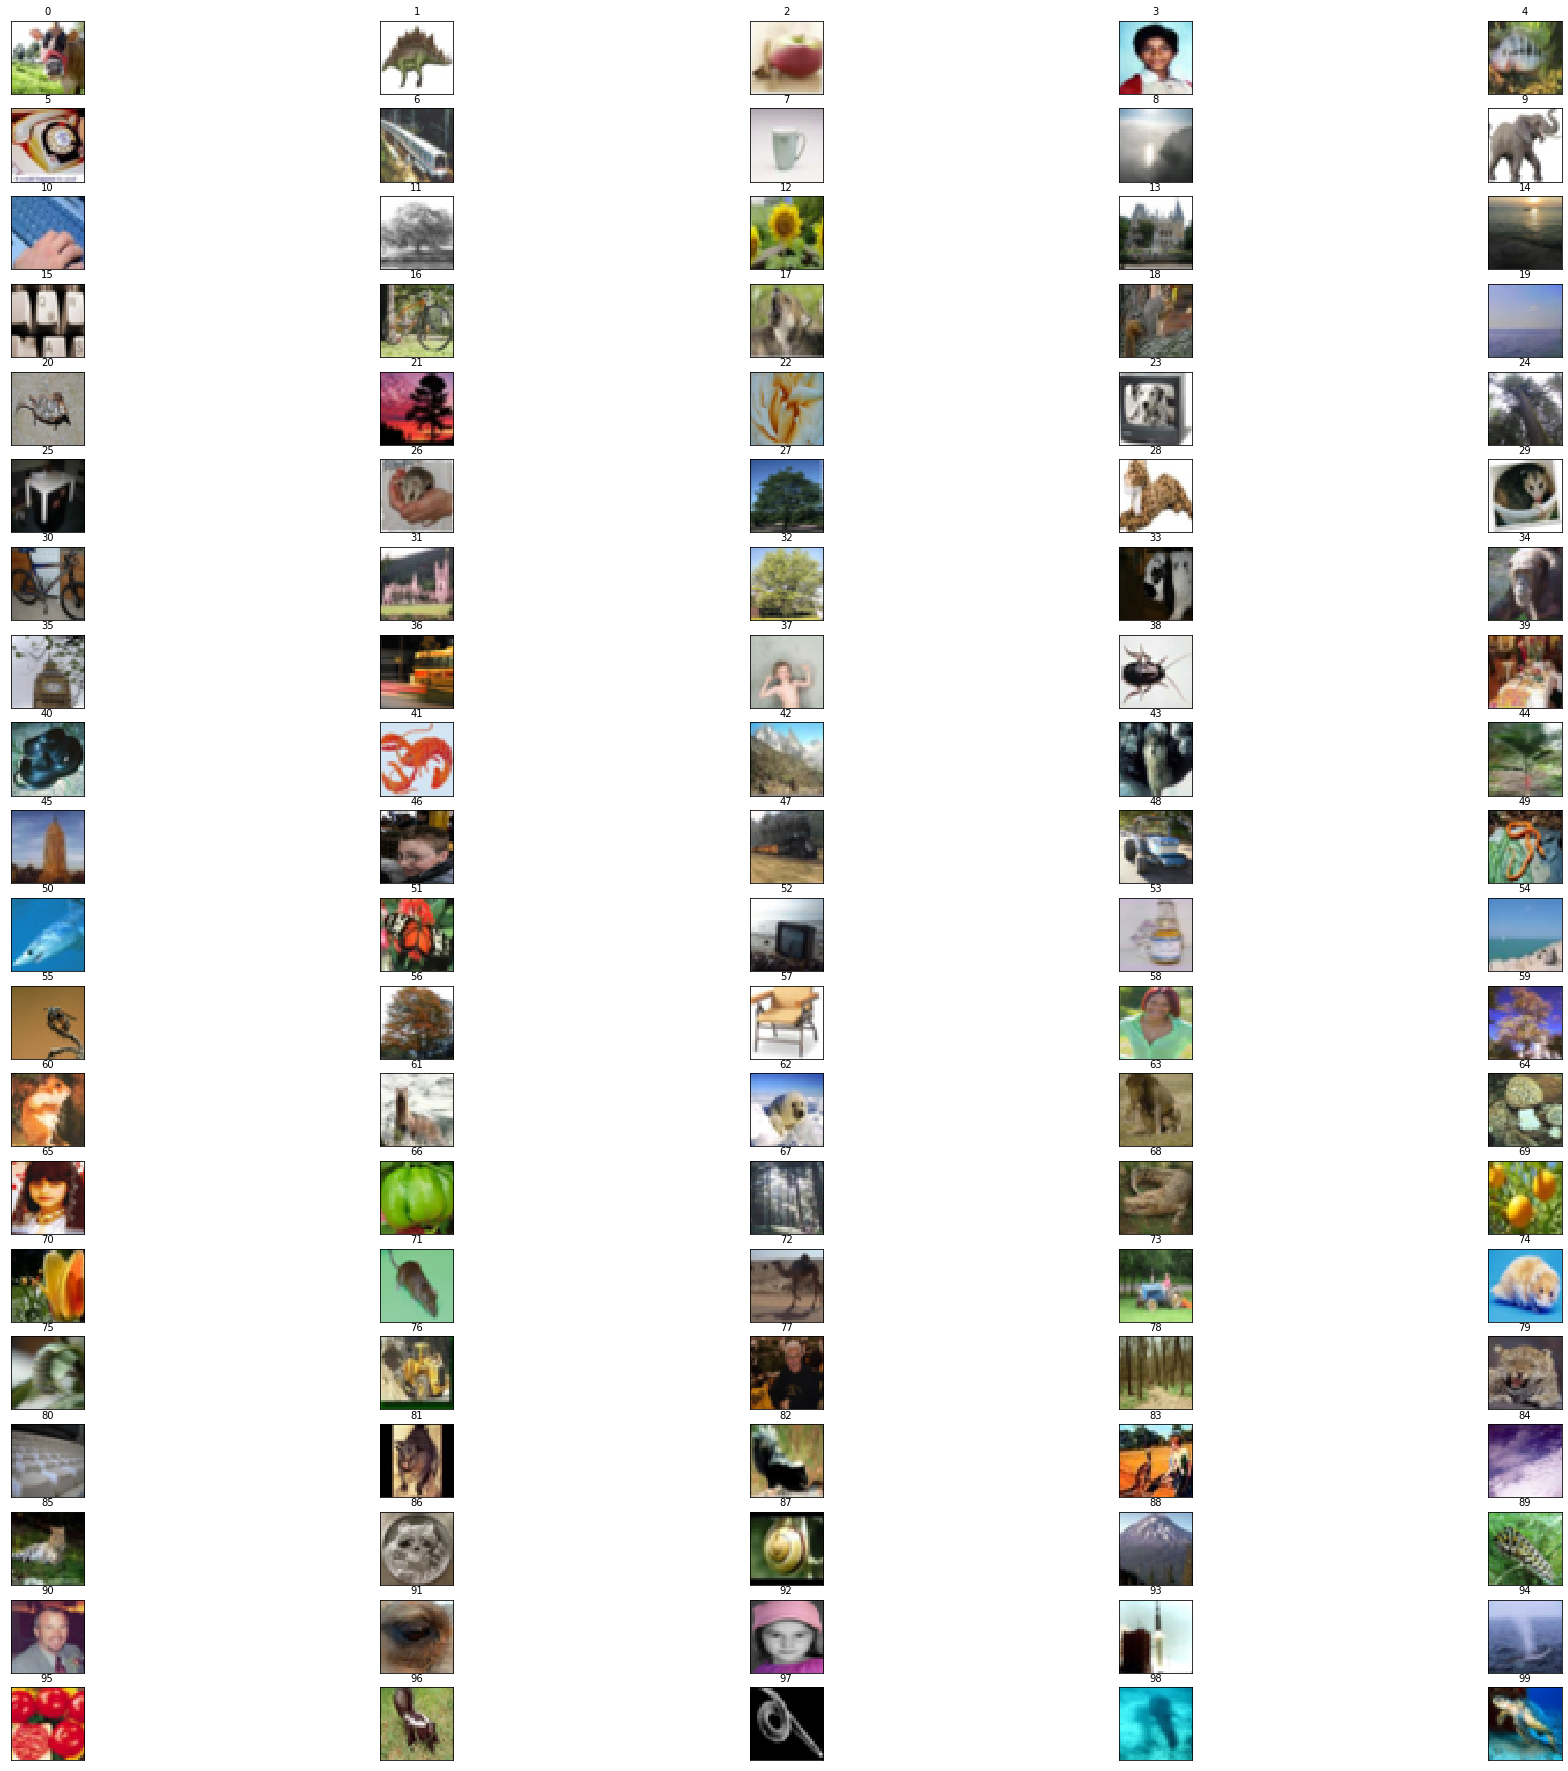

In [37]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [38]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [39]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [40]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [41]:
y_label_train.shape

(50000, 1)

In [42]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [43]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [45]:
y_label_train_OneHot.shape

(50000, 100)

In [46]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.